In [1]:
import sys
import pprint
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
sys.path.append('..')
from facerec.facerec import *

pprint.pprint(sys.path)

['/home/ito/facerec/notebooks',
 '/home/ito/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles',
 '/home/ito/.vscode-server/extensions/ms-toolsai.jupyter-2021.11.1001550889/pythonFiles/lib/python',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/ito/facerec/.venv/lib/python3.8/site-packages',
 '/home/ito/facerec/.venv/lib/python3.8/site-packages/IPython/extensions',
 '/home/ito/.ipython',
 '..']


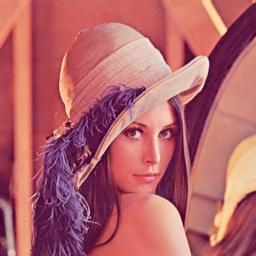

In [2]:
from PIL import Image
im = Image.open('../data/lena.jpg')
im

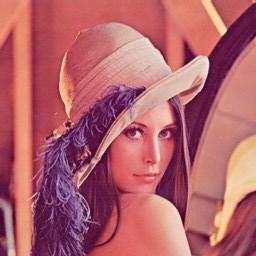

In [3]:
img = read_img('../data/lena.jpg')

hsv_img = rgb2hsv(img)
rgb_img = hsv2rgb(hsv_img)

pil_img = Image.fromarray(rgb_img)
pil_img

In [4]:
hsv2rgb(rgb2hsv(np.array([[[185, 98, 106]]])))

array([[[183,  97, 105]]], dtype=uint8)

In [5]:
rgb2hsv(np.array([[[252, 226, 196]]]))

array([[[32, 22, 98]]])

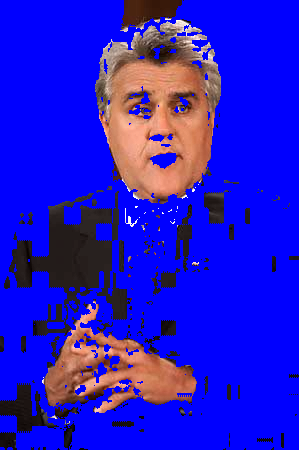

In [6]:
img_path = '../data/fddb/2003/05/01/big/img_1301.jpg'
hsv_img = rgb2hsv(read_img(img_path))

# 肌色 #FCE2C4, H32 S22 V99 の部分を青に
skin_h = 32
delta_h = 20
hsv_img[(hsv_img[:, :, 0] < skin_h - delta_h) | (hsv_img[:, :, 0] > skin_h + delta_h)] = np.array([240, 100, 100])
Image.fromarray(hsv2rgb(hsv_img))

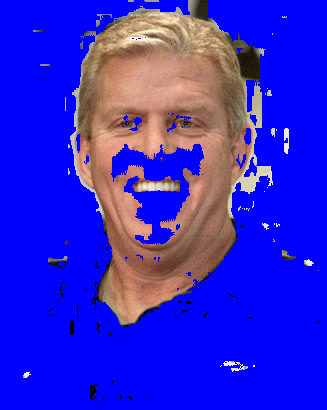

In [7]:
img_path = '../data/fddb/2003/01/01/big/img_547.jpg'
hsv_img = rgb2hsv(read_img(img_path))

# 肌色 #FCE2C4, H32 S22 V99 の部分を青に
skin_h = 32
delta_h = 20
hsv_img[(hsv_img[:, :, 0] < skin_h - delta_h) | (hsv_img[:, :, 0] > skin_h + delta_h)] = np.array([240, 100, 100])
Image.fromarray(hsv2rgb(hsv_img))

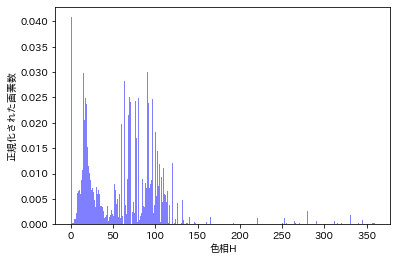

In [8]:
img_path = '../data/fddb/2003/01/01/big/img_547.jpg'
hsv_img = rgb2hsv(read_img(img_path))

n, bins, patches = plt.hist(hsv_img[:, :, 0].ravel(), range=(0, 360), bins=360, facecolor='blue', alpha=0.5, density=True)
plt.xlabel("色相H")
plt.ylabel("正規化された画素数")
plt.show()

元画像: (410, 327, 3)
トリム後: (234, 143, 3)


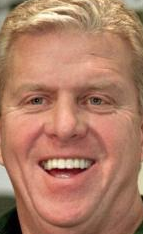

In [9]:
img_path = '../data/fddb/2003/01/01/big/img_547.jpg'
rgb_img = read_img(img_path)
print("元画像:", rgb_img.shape)

im_trim1 = trim(rgb_img, 90, 23, 143, 234)
print("トリム後:", im_trim1.shape)
Image.fromarray(im_trim1)


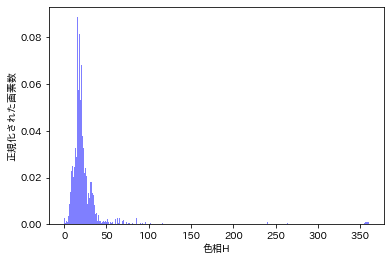

In [10]:
plt.hist(rgb2hsv(im_trim1)[:, :, 0].ravel(), range=(0, 360), bins=360, facecolor='blue', alpha=0.5, density=True)
plt.xlabel("色相H")
plt.ylabel("正規化された画素数")
plt.show()

In [11]:
hist1, bin_edges = np.histogram(rgb2hsv(im_trim1)[:, :, 0].ravel(), range=(0, 360), bins=360, density=True)
hist1

array([2.59996414e-03, 6.27577551e-04, 1.25515510e-03, 1.01607794e-03,
       4.39304285e-03, 3.58615743e-03, 8.87573964e-03, 1.38067061e-02,
       2.29514076e-02, 2.48341402e-02, 2.46847170e-02, 2.01721356e-02,
       2.45651784e-02, 3.28133405e-02, 2.85697209e-02, 8.86378579e-02,
       5.74084036e-02, 7.64449226e-02, 8.12563505e-02, 5.32245532e-02,
       6.83461837e-02, 3.76546530e-02, 3.26639173e-02, 2.63881418e-02,
       2.19950989e-02, 2.38778316e-02, 2.06204052e-02, 8.48723926e-03,
       1.34779750e-02, 1.13561652e-02, 1.74526328e-02, 1.79307872e-02,
       1.82595183e-02, 1.32687825e-02, 1.23124739e-02, 8.03896958e-03,
       6.48496802e-03, 4.27350427e-03, 4.63212002e-03, 1.40457833e-03,
       4.00454247e-03, 1.49423226e-03, 1.43446297e-03, 2.86892595e-03,
       7.17231486e-04, 1.16550117e-03, 1.34480904e-03, 1.16550117e-03,
       1.49423226e-03, 2.09192517e-04, 9.86193294e-04, 2.09192517e-03,
       9.26424003e-04, 5.97692905e-05, 1.10573187e-03, 5.37923615e-04,
      

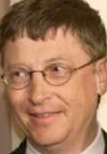

In [12]:
img_path = '../data/fddb/2002/11/01/big/img_733.jpg'
img2 = read_img(img_path)
# Image.fromarray(img2)
im_trim2 = trim(img2, 138, 42, 107, 154)
hist2, bin_edges = np.histogram(rgb2hsv(im_trim2)[:, :, 0].ravel(), range=(0, 360), bins=360, density=True)
Image.fromarray(im_trim2)

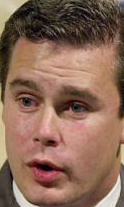

In [13]:
img_path = '../data/fddb/2002/11/20/big/img_269.jpg'
img3 = read_img(img_path)
# Image.fromarray(img3)
im_trim3 = trim(img3, 102, 28, 124, 207)
hist3, bin_edges = np.histogram(rgb2hsv(im_trim3)[:, :, 0].ravel(), range=(0, 360), bins=360, density=True)
Image.fromarray(im_trim3)

Text(0, 0.5, '正規化された画素数')

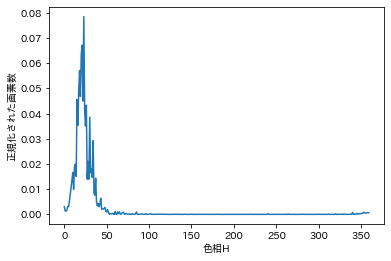

In [24]:
average_face_hue_hist = np.mean([hist1, hist2, hist3], axis=0)
plt.plot(average_face_hue_hist)
plt.xlabel("色相H")
plt.ylabel("正規化された画素数")

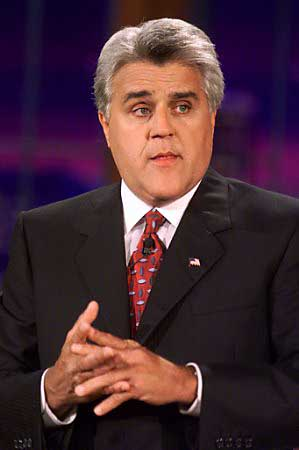

In [15]:
img_path = '../data/fddb/2003/05/01/big/img_1301.jpg'
img = read_img(img_path)
Image.fromarray(img)

(25, 360) (360,)


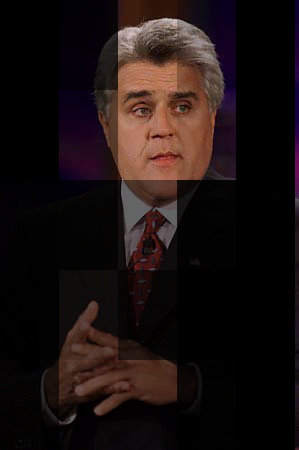

In [16]:
region_hists = region_hist(img, 5)
h, w, _ = region_hists.shape
print(region_hists.reshape(-1, 360).shape, average_face_hue_hist.shape)
region_hists = region_hists.reshape((-1, 360))
cos_sim_mat = cos_sim(region_hists, average_face_hue_hist).reshape((h, w))

result_img = region_filter(img, cos_sim_mat, 5)
Image.fromarray(result_img)

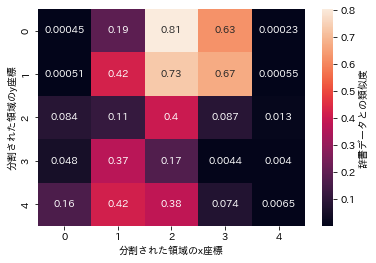

In [19]:
sns.heatmap(cos_sim_mat, annot=True, cbar_kws={'label': '辞書データとの類似度'})
plt.xlabel("分割された領域のx座標")
plt.ylabel("分割された領域のy座標")
plt.show()